# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +29.54794811010                   -1.41    5.04s
  2   +19.18571515772        1.02       -0.89   10.6ms
  3   +13.16615326977        0.78       -0.56   10.5ms
  4   +12.07042324905        0.04       -0.51   8.48ms
  5   +10.47748268167        0.20       -0.71   10.6ms
  6   +9.783698104548       -0.16       -0.90   8.55ms
  7   +9.215985280987       -0.25       -0.96   8.42ms
  8   +8.728730168596       -0.31       -0.93   8.39ms
  9   +8.415390816858       -0.50       -0.92   8.50ms
 10   +8.272023822190       -0.84       -0.97   8.43ms
 11   +8.206688408407       -1.18       -1.02   8.42ms
 12   +8.149397003299       -1.24       -1.03   8.42ms
 13   +8.087361915946       -1.21       -1.07   6.46ms
 14   +8.044086009041       -1.36       -1.04   6.43ms
 15   +8.014075239706       -1.52       -1.13   6.43ms
 16   +7.972342091228       -1.38       -0.86   51.7ms
 17   +7.92

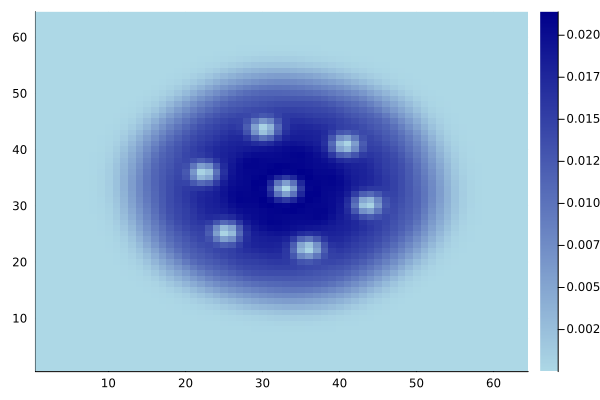

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)